<a href="https://colab.research.google.com/github/dhruvingandhi11/Titanic-ml-disaster/blob/master/Titanic_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Titanic problem/train.csv')
df1 = pd.read_csv('/content/drive/My Drive/Titanic problem/test.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dfy = df.Survived

df.drop(['PassengerId','Survived','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)
df1.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)

In [ ]:
dfy

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [ ]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [ ]:
print('shape of training data: ',df.shape)
print('shape of testing data: ',df1.shape )

shape of training data:  (891, 6)
shape of testing data:  (418, 6)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  889 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [ ]:
df.describe()

,Pclass,Age,SibSp,Parch
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594
std,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000


In [ ]:
df1.describe()

,Pclass,Age,SibSp,Parch
count,418.000000,332.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344
std,0.841838,14.181209,0.896760,0.981429
min,1.000000,0.170000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000
75%,3.000000,39.000000,1.000000,0.000000
max,3.000000,76.000000,8.000000,9.000000


In [ ]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [ ]:
column_df = df.columns

for x in column_df:
  print('unique value information: ',x)
  # print(df[x].unique())
  print('number of unique values: ',df[x].unique().shape[0])
  print('number of null (True if value is NaN) : \n',df[x].isnull().value_counts())
  print('\n-----------------------------------------------------------------\n')

unique value information:  Pclass
number of unique values:  3
number of null (True if value is NaN) : 
 False    891
Name: Pclass, dtype: int64

-----------------------------------------------------------------

unique value information:  Sex
number of unique values:  2
number of null (True if value is NaN) : 
 False    891
Name: Sex, dtype: int64

-----------------------------------------------------------------

unique value information:  Age
number of unique values:  89
number of null (True if value is NaN) : 
 False    714
True     177
Name: Age, dtype: int64

-----------------------------------------------------------------

unique value information:  SibSp
number of unique values:  7
number of null (True if value is NaN) : 
 False    891
Name: SibSp, dtype: int64

-----------------------------------------------------------------

unique value information:  Parch
number of unique values:  7
number of null (True if value is NaN) : 
 False    891
Name: Parch, dtype: int64

---------

In [ ]:
columns_df1 = df1.columns

for x in columns_df1:
  print('unique value information: ',x)
  #print(df1[x].unique())
  print('number of unique values: ',df1[x].unique().shape[0])
  print('number of null (True if value is NaN): \n',df1[x].isnull().value_counts())
  print('\n-------------------------------------------------------------\n')

unique value information:  Pclass
number of unique values:  3
number of null (True if value is NaN): 
 False    418
Name: Pclass, dtype: int64

-------------------------------------------------------------

unique value information:  Sex
number of unique values:  2
number of null (True if value is NaN): 
 False    418
Name: Sex, dtype: int64

-------------------------------------------------------------

unique value information:  Age
number of unique values:  80
number of null (True if value is NaN): 
 False    332
True      86
Name: Age, dtype: int64

-------------------------------------------------------------

unique value information:  SibSp
number of unique values:  7
number of null (True if value is NaN): 
 False    418
Name: SibSp, dtype: int64

-------------------------------------------------------------

unique value information:  Parch
number of unique values:  8
number of null (True if value is NaN): 
 False    418
Name: Parch, dtype: int64

------------------------------

## Replace **NaN** with **mean** **Value** 

Age in df and df1

In [ ]:
df.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [ ]:
df.Age.fillna(df.Age.mean(),inplace=True)

In [ ]:
df.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

In [ ]:
df1.Age.isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [ ]:
df1.Age.fillna(df1.Age.mean(), inplace = True)

In [ ]:
df1.Age.isnull().value_counts()

False    418
Name: Age, dtype: int64

## Embarked in df has 2 missing values, replace it by **mode** of that column

In [ ]:
df.Embarked.isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.Embarked.fillna('S',inplace = True)

In [ ]:
df.Embarked.isnull().value_counts()

False    891
Name: Embarked, dtype: int64

# labeling of column which contain catagorical data in object data type ('Sex' and 'Embarked')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

le.fit(df.Sex)
Sex_labeled = le.transform(df.Sex)
df['Sex_labeled'] = Sex_labeled
df.drop(['Sex'],axis = 1, inplace = True)

le.fit(df.Embarked)
Embarked_labeled = le.transform(df.Embarked)
df['Embarked_labeled'] = Embarked_labeled
df.drop(['Embarked'],axis =1, inplace = True)

le.fit(df1.Sex)
Sex_labeled= le.transform(df1.Sex)
df1['Sex_labeled'] = Sex_labeled
df1.drop(['Sex'], axis =1, inplace =True)

le.fit(df1.Embarked)
Embarked_labeled = le.transform(df1.Embarked)
df1['Embarked_labeled'] = Embarked_labeled
df1.drop(['Embarked'], axis =1, inplace =True)

In [ ]:
df.head()

,Pclass,Age,SibSp,Parch,Sex_labeled,Embarked_labeled
0,3,22.0,1,0,1,2
1,1,38.0,1,0,0,0
2,3,26.0,0,0,0,2
3,1,35.0,1,0,0,2
4,3,35.0,0,0,1,2


In [ ]:
df1.head()

,Pclass,Age,SibSp,Parch,Sex_labeled,Embarked_labeled
0,3,34.5,0,0,1,1
1,3,47.0,1,0,0,2
2,2,62.0,0,0,1,1
3,3,27.0,0,0,1,2
4,3,22.0,1,1,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   Age               891 non-null    float64
 2   SibSp             891 non-null    int64  
 3   Parch             891 non-null    int64  
 4   Sex_labeled       891 non-null    int64  
 5   Embarked_labeled  891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Age               418 non-null    float64
 2   SibSp             418 non-null    int64  
 3   Parch             418 non-null    int64  
 4   Sex_labeled       418 non-null    int64  
 5   Embarked_labeled  418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


# Normalizing Data

In [ ]:
x = np.array(df)
y = np.array(dfy)

x1 = np.array(df1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)
x1 = scaler.fit_transform(x1)

# Train test split df

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(df, dfy, test_size =0.2)

In [ ]:
print('Shape of Train and Test Set: ')
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ',y_test.shape)

Shape of Train and Test Set: 
x_train:  (712, 6)
x_test:  (179, 6)
y_train:  (712,)
y_test:  (179,)


# Random Forest Model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import roc_auc_score

In [ ]:
model_rfc = RFC(max_depth=10, n_estimators =100, random_state = 2)
model_rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
model_rfc.score(x_test,y_test)

0.8324022346368715

In [ ]:
y_pred = model_rfc.predict(df1)
#roc_auc_score(y_test,y_pred)

# SVM Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC(C=10)
model_svm.fit(df,dfy)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_svm.score(df,dfy)

0.8159371492704826

In [ ]:
y_pred = model_svm.predict(df1)

#roc_auc_score(y_test,y_pred)

# Solve by ANN

In [ ]:
# create Model 

model = keras.Sequential()
model.add(layers.Dense(12 , activation="sigmoid", input_shape=(6,)))
model.add(layers.Dense(6, activation="sigmoid")),
model.add(layers.Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


Epoch 1/600
23/23 [==============================] - 0s 13ms/step - loss: 0.6645 - auc: 0.4756 - val_loss: 0.6763 - val_auc: 0.5172
Epoch 2/600
23/23 [==============================] - 0s 2ms/step - loss: 0.6642 - auc: 0.4545 - val_loss: 0.6746 - val_auc: 0.5099
Epoch 3/600
23/23 [==============================] - 0s 2ms/step - loss: 0.6635 - auc: 0.4744 - val_loss: 0.6742 - val_auc: 0.5113
Epoch 4/600
23/23 [==============================] - 0s 2ms/step - loss: 0.6633 - auc: 0.5077 - val_loss: 0.6736 - val_auc: 0.4984
Epoch 5/600
23/23 [==============================] - 0s 2ms/step - loss: 0.6630 - auc: 0.5201 - val_loss: 0.6734 - val_auc: 0.5356
Epoch 6/600
23/23 [==============================] - 0s 2ms/step - loss: 0.6628 - auc: 0.5120 - val_loss: 0.6725 - val_auc: 0.5482
Epoch 7/600
23/23 [==============================] - 0s 2ms/step - loss: 0.6624 - auc: 0.5224 - val_loss: 0.6717 - val_auc: 0.5479
Epoch 8/600
23/23 [==============================] - 0s 2ms/step - loss: 0.6620 - 

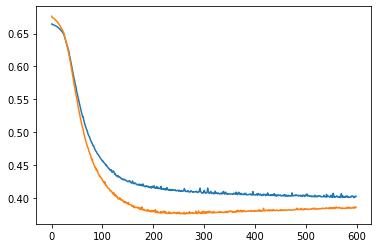

In [ ]:
# fit and compile model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[keras.metrics.AUC()])

history= model.fit(x_train,y_train,batch_size=32,epochs=600,validation_data=(x_test,y_test))

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [ ]:
y_pred = model.predict_classes(df1)

#roc_auc_score(y_test,y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


# Crreate submission file

In [ ]:
Survived = np.squeeze(y_pred)

In [ ]:
PassengerId = np.arange(892,1310)

In [ ]:
ans = pd.DataFrame(list(zip(PassengerId,Survived)),columns=['PassengerId','Survived'])
ans.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
ans.shape

(418, 2)

In [ ]:
ans.to_csv('/content/drive/My Drive/Titanic problem/ans.csv',index =False)